# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [2]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [5]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The GRE is scored on a larger scale than GPAs which are on a 4.0 scale. This means that the scores can have larger variation.

#### Question 4. Drop data points with missing data


In [8]:
df_new = df_raw.dropna()

In [9]:
df_new

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


In [10]:
df_new.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [13]:
df_new.isnull().any()

admit       False
gre         False
gpa         False
prestige    False
dtype: bool

Answer: I first dropped all rows with missing data and then counted the records to ensure that the number looked okay. Then I checked each column for any NaN values which none of them had.

#### Question 6. Create box plots for GRE and GPA

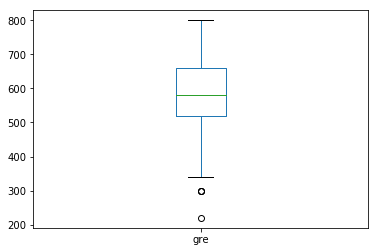

In [15]:
df_new["gre"].plot(kind = "box")

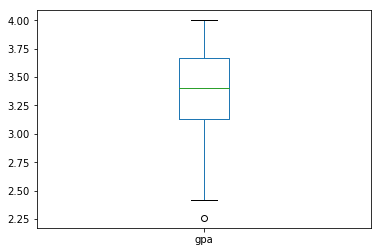

In [16]:
df_new["gpa"].plot(kind = "box")

#### Question 7. What do this plots show?

Answer: These plots show the spread of the data and the existence of any extreme values. Both GRE and GPA have outliers and neither of them is a symmetrical distribution of data.

#### Question 8. Describe each distribution 

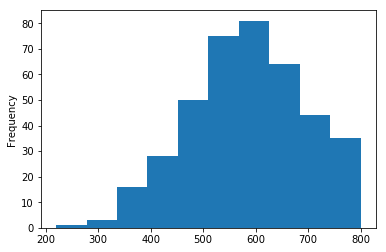

In [20]:
df_new["gre"].plot.hist()


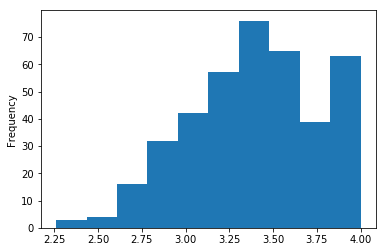

In [21]:
df_new["gpa"].plot.hist()

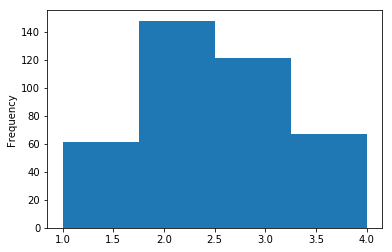

In [23]:
df_new["prestige"].plot.hist(bins = 4)

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: We would not meet that requirement as our data is skewed left.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: This distribution can be corrected by removing the outliers. This would reduce the skew of the distribution, making it easier to see a correlation that is unaffected by extreme outcomes.

#### Question 11. Which of our variables are potentially colinear? 

In [24]:
# create a correlation matrix for the data
df_new.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: Prestige had the strongest negative correlation with admittance, while GRE and GPA had similar correlations with Admittance.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: I would first plot admittance against prestige, then try to find a model that fits the data. I would then use a hypothesis test to truly test at the 95% confidence level, whether admittance and prestige are correlated.

#### Question 14. What is your hypothesis? 

Answer: My hypothesis is that prestige is correlated with admittance. My null hypothesis would be that prestige is not correlated with admittance.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

In [27]:
df_log = np.log(df_new+1)

In [28]:
df_log

,admit,gre,gpa,prestige
0,0.000000,5.942799,1.528228,1.386294
1,0.693147,6.493754,1.541159,1.386294
2,0.693147,6.685861,1.609438,0.693147
3,0.693147,6.463029,1.432701,1.609438
4,0.000000,6.255750,1.368639,1.609438
5,0.693147,6.634633,1.386294,1.098612
6,0.693147,6.329721,1.381282,0.693147
7,0.000000,5.993961,1.406097,1.098612
8,0.693147,6.293419,1.479329,1.386294
9,0.000000,6.552508,1.593309,1.098612


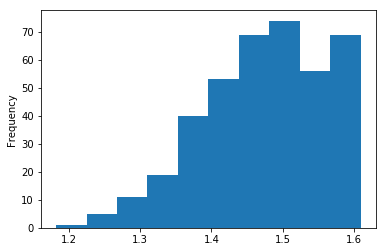

In [34]:
df_log["gpa"].plot.hist()

#### 3. Advanced: Impute missing data

In [35]:
df_raw.fillna(0)

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


In [39]:
df_raw.isnull().any()

admit       False
gre          True
gpa          True
prestige     True
dtype: bool